# Rules
* Internet and Books are ALLOWED
* Name your file as following: StudentID_ChineseName/EnglishName_quiz#
* Extension of your file or your file type should be .py

# Principal Component Analysis

Applying PCA for image compressing.

Using PCA that is known for its dimension reduction, we will compress a picture while retaining some of the important image features.



- Hint : Use np.cumsum to calculate the explained variance.
- Hint : Use cv2 to read the picture.

Here we have 2 input images, black white and colored

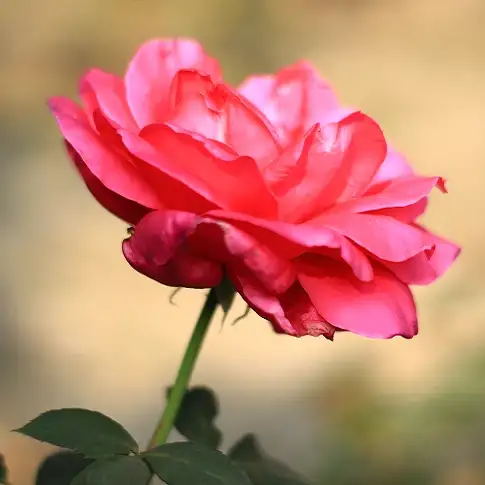 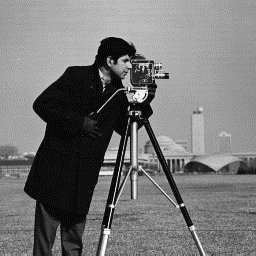

For the question , you need to find the minimum value for PCA components that results in explained variance of **at least** 95%.

## Instruction:

For black and white image
1. Read the image with cv2 functions, your matrix would be in 2 dimensions.
2. Find the minimum PCA components that results in at least 95% explained variance.

For colored image
1. Read the image with cv2 functions, your matrix would be in 3 dimensions (3 channels of RGB).
2. Divide the 3-D matrix in to 3 2-D  matrix for each channel
3. To deal with RGB channel , you need scale the matrix elements into 0 to 1. This can be done by dividing the matrix with 255 **on every channel**.
4. For all the channels, find the minimum PCA components that result in 95% explained variance. Make sure that every channel has the minimum of 95% explained variance. **We only want 1 value of PCA components, not 3!**

**We only want the number of PCA components value. But you can check your reconstructed reduced image of the PCA if you want.**

Hint:

1. To apply PCA, use the module from sklearn.decomposition
2. To find the explained variance, use np.cumsum of the PCA -> np.cumsum(PCA.explained_variance_ratio_)


explained_variance_ratio_ will return percentage of variance explained by each of the selected components. This is why we will have to sum it up.

np.cumsum(PCA.explained_variance_ratio_) will return the percentage of "explained variance" for the PCA components. First element will be 1 component of explained variance, second element would be 2 components of explained variance and so on.

In [68]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

def find_minimum_conponents(img):
    pca = PCA()
    pca.fit(img)
    cum_ratio = np.cumsum(pca.explained_variance_ratio_)
    return np.searchsorted(cum_ratio, 0.95)

Number of PCA componets for black and white image: 38


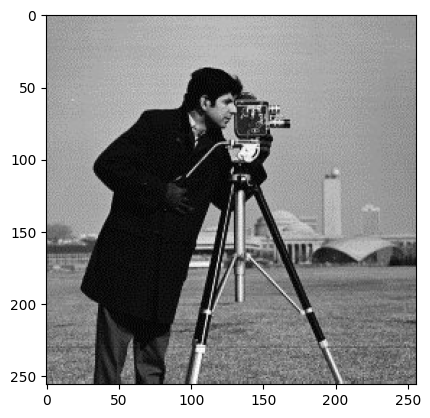

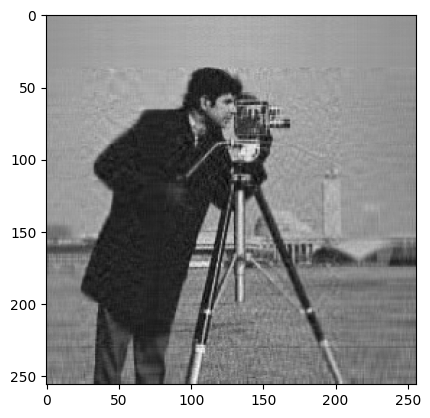

In [71]:
img = cv2.imread('cameraman.jpg', cv2.IMREAD_GRAYSCALE)
components = find_minimum_conponents(img)
print(f'Number of PCA componets for black and white image: {components}')

pca = PCA(n_components=components)
pca.fit(img)

pca_img = pca.transform(img)
new_img = pca.inverse_transform(pca_img)

plt.imshow(img, cmap = 'gray')
plt.show()
plt.imshow(new_img, cmap = 'gray')
plt.show()

Number of PCA componets for black and white image: 20


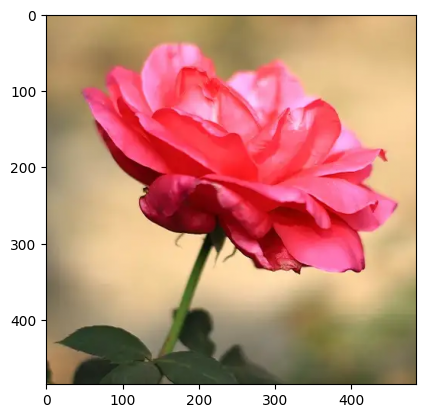

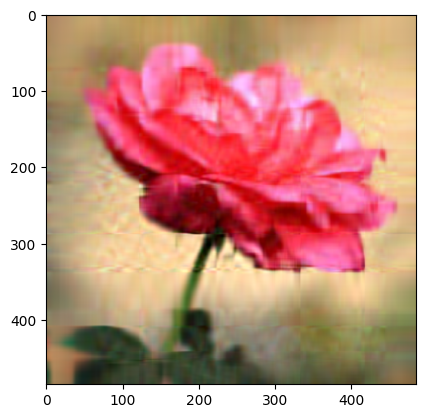

In [132]:
img = cv2.imread('rose.jpg') / 255
components_list = [find_minimum_conponents(img[:, :, c]) for c in range(3)]
components = max(components_list)
print(f'Number of PCA componets for black and white image: {components}')

w, h, _ = img.shape
pca_img = np.zeros([w, components, 3])
new_img = np.zeros([w, h, 3])
for c in range(3):
    pca = PCA(n_components=components)
    pca.fit(img[:, :, c])

    pca_img[:, :, c] = pca.transform(img[:, :, c])
    new_img[:, :, c] = pca.inverse_transform(pca_img[:, :, c])

new_img = np.clip(new_img, 0, 1)

plt.imshow(img[:, :, ::-1]) # transform image to rgb
plt.show()
plt.imshow(new_img[:, :, ::-1]) # transform image to rgb
plt.show()